# Part - 1
__Exploratory Data Analysis__

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


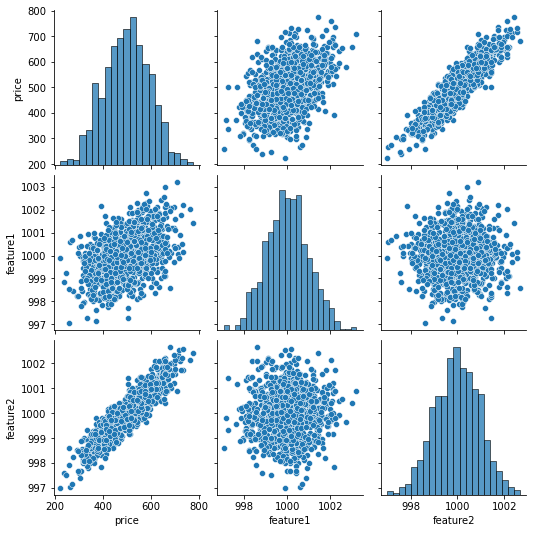

In [4]:
sns.pairplot(df)

# Part - 2
__Data Preprocessing and Creating a model__

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1', 'feature2']].values

In [7]:
y = df['price'].values

In [8]:
# X

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# help(MinMaxScaler)

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
# X_train.min()

# Part - 2
__Model Evaluation and Predictions__

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
# help(Dense)

In [21]:
model = Sequential()


model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

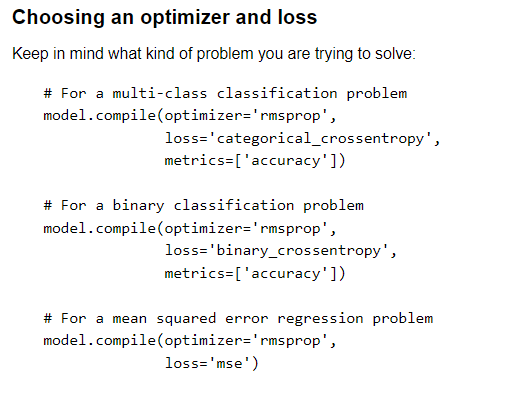

In [22]:
model.fit(x = X_train, y = y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 636us/step - loss: 256713.7344
Epoch 2/250
22/22 [==============================] - 0s 727us/step - loss: 256689.4688
Epoch 3/250
22/22 [==============================] - 0s 636us/step - loss: 256667.4062
Epoch 4/250
22/22 [==============================] - 0s 545us/step - loss: 256645.4844
Epoch 5/250
22/22 [==============================] - 0s 545us/step - loss: 256623.5469
Epoch 6/250
22/22 [==============================] - 0s 546us/step - loss: 256601.6719
Epoch 7/250
22/22 [==============================] - 0s 546us/step - loss: 256579.7969
Epoch 8/250
22/22 [==============================] - 0s 637us/step - loss: 256557.8906
Epoch 9/250
22/22 [==============================] - 0s 608us/step - loss: 256536.0156
Epoch 10/250
22/22 [==============================] - 0s 680us/step - loss: 256514.0781
Epoch 11/250
22/22 [==============================] - 0s 636us/step - loss: 256492.2031
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 591us/step - loss: 254744.4062
Epoch 92/250
22/22 [==============================] - 0s 727us/step - loss: 254722.7031
Epoch 93/250
22/22 [==============================] - 0s 682us/step - loss: 254700.8750
Epoch 94/250
22/22 [==============================] - 0s 727us/step - loss: 254678.9531
Epoch 95/250
22/22 [==============================] - 0s 863us/step - loss: 254657.1406
Epoch 96/250
22/22 [==============================] - 0s 955us/step - loss: 254635.3125
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 254613.6406
Epoch 98/250
22/22 [==============================] - 0s 955us/step - loss: 254591.8438
Epoch 99/250
22/22 [==============================] - 0s 910us/step - loss: 254569.9844
Epoch 100/250
22/22 [==============================] - 0s 818us/step - loss: 254548.2500
Epoch 101/250
22/22 [==============================] - 0s 683us/step - loss: 254526.3750
Epoch 102/250
22/22 [========================

22/22 [==============================] - 0s 455us/step - loss: 252742.1094
Epoch 184/250
22/22 [==============================] - 0s 471us/step - loss: 252720.3906
Epoch 185/250
22/22 [==============================] - 0s 500us/step - loss: 252698.6250
Epoch 186/250
22/22 [==============================] - 0s 500us/step - loss: 252676.9219
Epoch 187/250
22/22 [==============================] - 0s 545us/step - loss: 252655.2656
Epoch 188/250
22/22 [==============================] - 0s 500us/step - loss: 252633.4844
Epoch 189/250
22/22 [==============================] - 0s 500us/step - loss: 252611.7500
Epoch 190/250
22/22 [==============================] - 0s 500us/step - loss: 252590.0312
Epoch 191/250
22/22 [==============================] - 0s 591us/step - loss: 252568.3438
Epoch 192/250
22/22 [==============================] - 0s 545us/step - loss: 252546.6094
Epoch 193/250
22/22 [==============================] - 0s 546us/step - loss: 252524.8906
Epoch 194/250
22/22 [==============

In [23]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

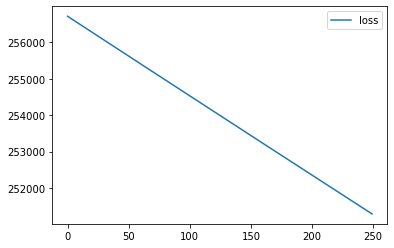

In [24]:
loss_df.plot()

In [25]:
model.evaluate(X_test, y_test, verbose=0)

253687.703125

In [26]:
model.evaluate(X_train, y_train,verbose=0)

251277.578125

In [27]:
test_predictions = model.predict(X_test)

In [28]:
# test_predictions

In [29]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [30]:
# test_predictions

In [31]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [32]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [33]:
pred_df.columns = ['Test True Y', 'Model Predictions']

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

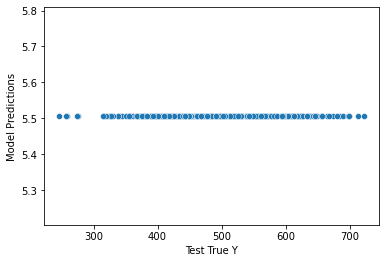

In [34]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

494.8693403867957

In [37]:
# df.describe()

In [38]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

503.6741960039992

In [39]:
new_gem = [[998,1000]]

In [40]:
new_gem = scaler.transform(new_gem)

In [41]:
model.predict(new_gem)

array([[5.505999]], dtype=float32)

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save('my_gem_model.h5')

In [44]:
later_model = load_model('my_gem_model.h5')

In [45]:
later_model.predict(new_gem)

array([[5.505999]], dtype=float32)

In [46]:
#The prediction is not accurate enough 
#To make it accurate enough we can run the model again and doing all that again
#That will make our model more and more used to the data
#And it will give a prediction accurate enough